In [1]:
# Naive Bayes Classification

# Importing the libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn


In [34]:
# 读取lesson.csv文件
df = pd.read_csv("lesson.csv")
# print(lesson)

'''
names = iris['target_names']
feature_names = iris['feature_names']
'''
# x1只是标识id，没有太大意义
df['id'] = df.index
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,y,id
0,1,1,2,3,1,4,1,3,2,1,3,1,0
1,1,2,2,3,1,4,1,4,2,2,3,1,1
2,2,2,2,3,1,3,1,3,1,2,3,1,2
3,2,1,2,2,1,4,1,2,1,2,3,1,3
4,1,1,2,2,1,4,1,4,1,1,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1,1,2,3,2,3,1,2,3,2,3,1,156
157,1,1,2,4,1,4,1,3,2,2,3,1,157
158,1,1,2,3,1,4,1,3,2,1,3,0,158
159,1,2,2,4,2,1,2,1,2,2,1,0,159


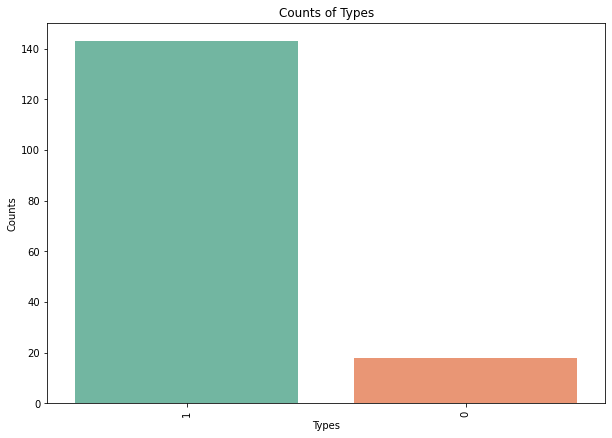

In [35]:
plt.figure(figsize= (10, 7))
sns.countplot(x = "y", data = df, palette = sns.color_palette("Set2", 18)
      , order=df['y'].value_counts().index)
plt.xlabel("Types")
plt.ylabel("Counts")
plt.title("Counts of Types")
plt.xticks(rotation = "vertical")
plt.show()

In [36]:
df_copy = df.copy()

# Get 10 random samples for test
test0 = df_copy.loc[df['y'] == 1].sample(28)
test1 = df_copy.loc[df['y'] == 0].sample(4)

# Create test and train data
test_data_temp = test0.append(test1)
train_data_temp = df.copy()

# Remove test data from data and generate train data
cond = train_data_temp['id'].isin(test_data_temp['id'])
train_data_temp.drop(train_data_temp[cond].index, inplace = True)

# Convert test and train into numbers
train_data = train_data_temp.to_numpy()
test_data = test_data_temp.to_numpy()

train_data_x = train_data[:,:-2]
train_data_y = train_data[:, -2]
# print(train_data_x)
# print(train_data_y)

test_data_x = test_data[:,:-2]
test_data_y = test_data[:, -2]
# print(test_data_x)
# print(test_data_y)

In [28]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import MultinomialNB
nvclassifier = MultinomialNB()
nvclassifier.fit(train_data_x, train_data_y)

MultinomialNB()

In [29]:
# Predicting the Test set results
y_pred = nvclassifier.predict(test_data_x)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [30]:
#lets see the actual and predicted value side by side
y_compare = np.vstack((test_data_y,y_pred)).T
#actual value on the left side and predicted value on the right hand side
#printing the top 5 values
y_compare[:5,:]

array([[1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1]])

In [31]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_data_y, y_pred)
print(cm)

[[ 0  4]
 [ 0 28]]


In [32]:
#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', corrPred/(cm.sum()))            


Correct predictions:  28
False predictions 4


Accuracy of the Naive Bayes Clasification is:  0.875
